# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [158]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [139]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [140]:
# save config information.
url ="http://api.openweathermap.org/data/2.5/weather?"
units="metrics"

In [141]:
new_city=[]
lat=[]         
lng=[]           
max_temp=[]    
humidity =[]     
cloudiness =[] 
wind_speed =[]   
country =[]      
date  =[]     

query_url=(f"{url}appid={weather_api_key}&units={units}&q=")
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=36d27378545f7daafa9d3ff4e9ef2e7a&units=metrics&q='

In [142]:
print(f"Beginning Data Retrieval")
print(f"------------------------")

for city in cities:
    try:
        time.sleep(1)

        response=requests.get(query_url +city)
        json_response=response.json()
        #print(json.dumps(json_response, indent=4, sort_keys=True))
        new_city.append(json_response["name"])
        lat.append(json_response["coord"]["lat"])
        lng.append(json_response["coord"]["lon"])
        max_temp.append(json_response["main"]["temp_max"])
        humidity.append(json_response["main"]["humidity"])
        cloudiness.append(json_response["clouds"]["all"])
        wind_speed.append(json_response["wind"]["speed"])
        country.append(json_response["sys"]["country"])
        date.append(json_response["dt"])
        print(f"Processing {city}")
    except KeyError:
        print("Another one!")
print(f"-------------------------------")
print(f"Ending Data Retrieval")

Beginning Data Retrieval
------------------------
Processing tuktoyaktuk
Processing qaanaaq
Processing hobart
Processing chokurdakh
Processing ribeira grande
Processing rikitea
Processing saskylakh
Processing klaksvik
Processing nampula
Processing chinhoyi
Processing busselton
Processing petropavlovsk-kamchatskiy
Another one!
Processing presidencia roque saenz pena
Processing bluff
Processing hilo
Processing ushuaia
Processing carnarvon
Processing ahipara
Processing port hedland
Another one!
Processing baykalsk
Processing khatanga
Processing paragominas
Processing punta arenas
Processing santa luzia
Processing talnakh
Processing bambous virieux
Processing avarua
Processing conde
Another one!
Processing kushiro
Processing hermanus
Processing kadnikov
Processing longyearbyen
Processing kapaa
Processing mount isa
Processing port lincoln
Processing guozhen
Processing atuona
Processing airai
Processing bengkulu
Processing dikson
Processing shenavan
Processing port alfred
Another one!
Proces

Processing rawson
Processing goderich
Processing nacala
Processing lensk
Processing hirado
Processing saint-augustin
Processing sorland
Processing gigmoto
Processing alcaniz
Processing takoradi
Processing bagdarin
Processing sturgeon bay
Processing marsassoum
Another one!
Processing villa bruzual
Processing inirida
Processing metro
Processing bilibino
Processing south houston
Processing kabale
Another one!
Processing valparaiso
Processing cap malheureux
Processing morrope
Processing dicabisagan
Processing sibiti
Processing tolga
Processing letka
Processing tanout
Processing beringovskiy
Processing isla vista
Processing port hawkesbury
Processing troitskoye
Processing nishihara
Processing nakamura
Processing impfondo
Processing tobati
Processing necochea
Processing plattsburgh
Processing mosetse
Processing kailua
Processing babati
Processing abu dhabi
Processing evanston
Processing qasigiannguit
Processing zabol
Processing la macarena
Processing salem
Processing nhulunbuy
Processing kik

In [143]:
new_weather_df=pd.DataFrame({"City":new_city,
                           "Lat":lat,
                           "Lng":lng,
                           "Max Temp":max_temp,
                           "Humidity":humidity,
                           "Cloudiness":cloudiness,
                           "Wind Speed":wind_speed,
                           "Country":country,
                           "Date":date})
new_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.45,-133.04,281.17,95,99,6.67,CA,1596891208
1,Qaanaaq,77.48,-69.36,277.20,70,44,1.88,GL,1596891209
2,Hobart,-42.88,147.33,277.15,93,20,3.10,AU,1596891031
3,Chokurdakh,70.63,147.92,277.96,83,100,5.61,RU,1596891212
4,Ribeira Grande,38.52,-28.70,297.15,60,75,3.60,PT,1596891213


In [144]:
new_weather_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [145]:
new_weather_df.to_csv("../output_data/weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [146]:
new_weather2_df=new_weather_df.loc[new_weather_df["Humidity"]<=100]
new_weather2_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.45,-133.04,281.17,95,99,6.67,CA,1596891208
1,Qaanaaq,77.48,-69.36,277.20,70,44,1.88,GL,1596891209
2,Hobart,-42.88,147.33,277.15,93,20,3.10,AU,1596891031
3,Chokurdakh,70.63,147.92,277.96,83,100,5.61,RU,1596891212
4,Ribeira Grande,38.52,-28.70,297.15,60,75,3.60,PT,1596891213
...,...,...,...,...,...,...,...,...,...
560,Thinadhoo,0.53,72.93,302.00,75,0,4.35,MV,1596891899
561,Warrnambool,-38.38,142.48,283.71,90,100,0.89,AU,1596891767
562,Unity,52.45,-109.17,283.71,89,0,3.13,CA,1596891901
563,Rouvroy,50.39,2.90,309.82,23,32,2.60,FR,1596891902


In [147]:
new_weather2_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.796283,16.079681,294.639062,68.194690,51.371681,3.497858,1.596892e+09
std,33.608352,91.140843,8.169541,22.735785,40.585955,2.411871,2.054809e+02
min,-54.800000,-179.170000,274.150000,3.000000,0.000000,0.190000,1.596891e+09
25%,-8.740000,-67.490000,288.490000,55.000000,3.000000,1.680000,1.596891e+09
50%,24.800000,19.230000,296.150000,74.000000,58.000000,2.870000,1.596892e+09
75%,47.670000,98.520000,300.150000,86.000000,91.000000,4.640000,1.596892e+09
max,78.220000,179.320000,314.690000,100.000000,100.000000,15.450000,1.596892e+09


In [148]:
#  Get the indices of cities that have humidity over 100%.
cities_indicies=new_weather_df.loc[new_weather_df["Humidity"]>100].index
cities_indicies


Int64Index([], dtype='int64')

In [149]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


humidity_out=new_weather_df["Humidity"]
humidity_out
quartiles= humidity_out.quantile([.25,.5,.75])
lowerquartile=quartiles[0.25]
upperquartile=quartiles[0.75]
iqr=upperquartile-lowerquartile
#Determine the outlier using the upper and lower bound
humidity_lower_bound=lowerquartile - (1.5*iqr)
humidity_upper_bound=upperquartile + (1.5*iqr)
print(f"{humidity_lower_bound} and {humidity_upper_bound} are the outliers")

outliers_indexes=new_weather_df.loc[(new_weather_df["Humidity"]<humidity_lower_bound) & (new_weather_df["Humidity"]>humidity_upper_bound)].index
outliers_indexes



clean_city_data = new_weather_df.drop(outliers_indexes, inplace=False)
clean_city_data


8.5 and 132.5 are the outliers


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.45,-133.04,281.17,95,99,6.67,CA,1596891208
1,Qaanaaq,77.48,-69.36,277.20,70,44,1.88,GL,1596891209
2,Hobart,-42.88,147.33,277.15,93,20,3.10,AU,1596891031
3,Chokurdakh,70.63,147.92,277.96,83,100,5.61,RU,1596891212
4,Ribeira Grande,38.52,-28.70,297.15,60,75,3.60,PT,1596891213
...,...,...,...,...,...,...,...,...,...
560,Thinadhoo,0.53,72.93,302.00,75,0,4.35,MV,1596891899
561,Warrnambool,-38.38,142.48,283.71,90,100,0.89,AU,1596891767
562,Unity,52.45,-109.17,283.71,89,0,3.13,CA,1596891901
563,Rouvroy,50.39,2.90,309.82,23,32,2.60,FR,1596891902


In [150]:


humidity_out=new_weather_df["Humidity"]
humidity_out
quartiles= humidity_out.quantile([.25,.5,.75])
lowerquartile=quartiles[0.25]
upperquartile=quartiles[0.75]
iqr=upperquartile-lowerquartile
#Determine the outlier using the upper and lower bound
humidity_lower_bound=lowerquartile - (1.5*iqr)
humidity_upper_bound=upperquartile + (1.5*iqr)
print(f"{humidity_lower_bound} and {humidity_upper_bound} are the outliers")

new_day_df=new_weather_df.loc[(new_weather_df["Humidity"]>humidity_lower_bound) & (new_weather_df["Humidity"]<humidity_upper_bound)]
new_day_df

8.5 and 132.5 are the outliers


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.45,-133.04,281.17,95,99,6.67,CA,1596891208
1,Qaanaaq,77.48,-69.36,277.20,70,44,1.88,GL,1596891209
2,Hobart,-42.88,147.33,277.15,93,20,3.10,AU,1596891031
3,Chokurdakh,70.63,147.92,277.96,83,100,5.61,RU,1596891212
4,Ribeira Grande,38.52,-28.70,297.15,60,75,3.60,PT,1596891213
...,...,...,...,...,...,...,...,...,...
560,Thinadhoo,0.53,72.93,302.00,75,0,4.35,MV,1596891899
561,Warrnambool,-38.38,142.48,283.71,90,100,0.89,AU,1596891767
562,Unity,52.45,-109.17,283.71,89,0,3.13,CA,1596891901
563,Rouvroy,50.39,2.90,309.82,23,32,2.60,FR,1596891902


In [151]:
# Extract relevant fields from the data frame
extract_data=clean_city_data[["Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]]
extract_data


,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,69.45,281.17,95,99,6.67
1,77.48,277.20,70,44,1.88
2,-42.88,277.15,93,20,3.10
3,70.63,277.96,83,100,5.61
4,38.52,297.15,60,75,3.60
...,...,...,...,...,...
560,0.53,302.00,75,0,4.35
561,-38.38,283.71,90,100,0.89
562,52.45,283.71,89,0,3.13
563,50.39,309.82,23,32,2.60


In [152]:
# Export the City_Data into a csv
extract_data.to_csv("../output_data/extra.csv",index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

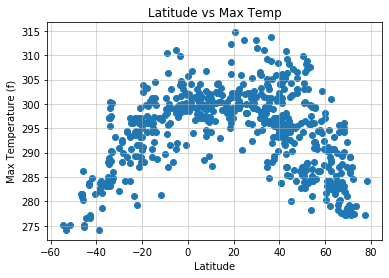

In [175]:
plt.scatter(extract_data['Lat'],extract_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
plt.title("Latitude vs Max Temp")

#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Max Temp.png")

plt.show()

## Latitude vs. Humidity Plot

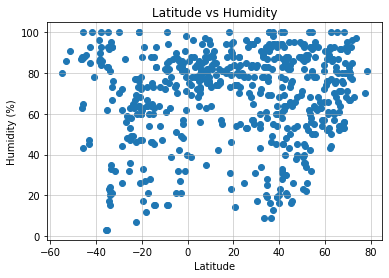

In [176]:
plt.scatter(extract_data['Lat'],extract_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs Humidity")
#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

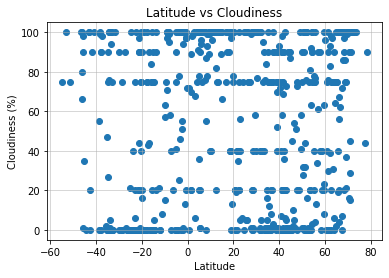

In [177]:
plt.scatter(extract_data['Lat'],extract_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs Cloudiness")
#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

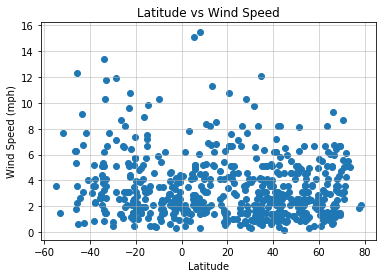

In [178]:
plt.scatter(extract_data['Lat'],extract_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude vs Wind Speed")
#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Wind Speed.png")

plt.show()

## Linear Regression

In [160]:
# OPTIONAL: Create a function to create Linear Regression plots
st.linregress(extract_data["Lat"],extract_data["Max Temp"])

# st.linregress(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])
# x_values = capomulin_mean['Weight (g)']
# y_values = capomulin_mean['Tumor Volume (mm3)']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Weight of mice')
# plt.ylabel('Average Tumor Volume (mm3)')
# plt.show()
# %matplotlib inline

LinregressResult(slope=-0.0029921835706102256, intercept=294.69829606021045, rvalue=-0.012309425789874762, pvalue=0.7703211944279698, stderr=0.010243852985466794)

In [179]:
st.linregress(extract_data["Lat"],extract_data["Humidity"])

LinregressResult(slope=0.04660600719414724, intercept=67.27206454891007, rvalue=0.0688936449474029, pvalue=0.10186037248034377, stderr=0.028443001935114717)

In [180]:
st.linregress(extract_data["Lat"],extract_data["Cloudiness"])

LinregressResult(slope=0.01907919272574027, intercept=50.99398431377322, rvalue=0.01579906715758029, pvalue=0.70786035491525, stderr=0.05088855784841764)

In [181]:
st.linregress(extract_data["Lat"],extract_data["Wind Speed"])

LinregressResult(slope=-0.008010120334919687, intercept=3.656429017582377, rvalue=-0.11161747574493001, pvalue=0.00791806310195311, stderr=0.003005594121707272)

In [166]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere=clean_city_data.loc[clean_city_data["Lat"]>=0]
#northern_hemisphere
southern_hemisphere=clean_city_data.loc[clean_city_data["Lat"]<0]
#southern_hemisphere

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression